In [50]:
import pandas 
import re
import csv
import matplotlib.pyplot as plt
from datetime import timedelta
import os
from scipy.stats import linregress
import numpy as np 

In [51]:
# this part should extract data and place in csv file

def extract_fluid_temp_value(line):
    # Use regular expression to find the value after 'V:' until the next whitespace
    match = re.search(r'V:\s(\d+\.\d+)', line)
    if match:
        return float(match.group(1))
    else:
        return None
    

In [52]:
def process_input_lines(input_lines):
    fluid_temp_values = []

    for line in input_lines:
        if 'Fluid Temp' in line:
            fluid_temp_value = extract_fluid_temp_value(line)
            if fluid_temp_value is not None:
                fluid_temp_values.append(fluid_temp_value)

    return fluid_temp_values

In [53]:
!cat logs-thermaltest7.txt|grep "Fluid Temp" > thermaltest_with_fluid_temp.txt 
!awk 'NR % 6 ==0' thermaltest_with_fluid_temp.txt >fluidcountfinal.txt 

### if using the awk comand set the interval in seconds to 30 seconds and change the file to be used in the cell below. 


In [54]:
input_file_path = '/home/novek/Documents/fluidcountfinal.txt'

with open(input_file_path, 'r') as file:
    input_lines = file.readlines()

fluid_temp_values = process_input_lines(input_lines)

output_csv_file = os.path.join(os.path.dirname(input_file_path), 'fluid_temp_partially_attached.csv')# quick fix to make the os read from the same directory. 

with open(output_csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Fluid Temp Value'])
    for value in fluid_temp_values:
        csv_writer.writerow([value])

#### uncomment the next cell if you want to plot the difference instead.

In [55]:
# input_csv_file = os.path.join(os.getcwd(), 'fluid_temp_partially_attached.csv')

# def plot_fluid_temp_data(csv_file):
#     timestamps = []
#     fluid_temp_values = []

#     with open(csv_file, 'r') as csvfile:
#         csv_reader = csv.reader(csvfile)
#         header = next(csv_reader)  # Skip the header row
#         for row in csv_reader:
#             fluid_temp_values.append(float(row[0]))

#     interval = 30 #time in seconds for plotting on the x-axis 
#     num_data_points = len(fluid_temp_values)
#     timestamps = [interval * i for i in range(num_data_points)]


#     fluid_temp_diff = [(fluid_temp_values[i] - fluid_temp_values[i - 1]) for i in range(1, num_data_points)]

#     print(min(fluid_temp_diff)) 

#     plt.figure(figsize=(10, 6))
#     plt.plot(timestamps[1:], fluid_temp_diff, marker='o', linestyle='-', color='b')
#     plt.xlabel('Time (seconds)')
#     plt.ylabel('fluid Temperature gradient')
#     plt.title('gradient of fluid Temperature for partially attached heater vs. Time')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()
# plot_fluid_temp_data(output_csv_file)

-0.00564666666666677
0.004316666666666673


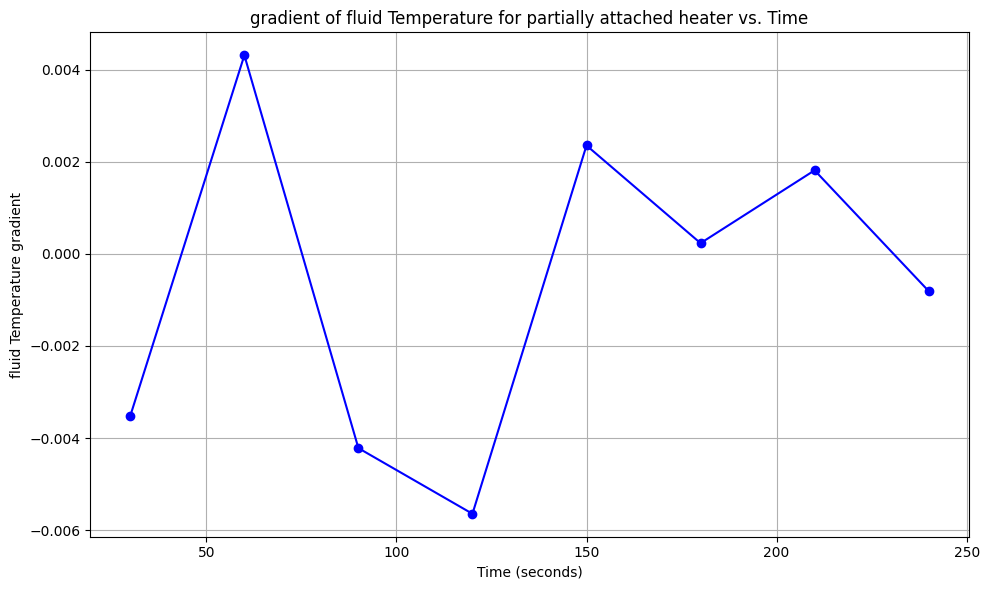

In [56]:
input_csv_file = os.path.join(os.getcwd(), 'fluid_temp_partially_attached.csv')

def plot_fluid_temp_data(csv_file):
    timestamps = []
    fluid_temp_values = []

    with open(csv_file, 'r') as csvfile:
        csv_reader = csv.reader(csvfile)
        header = next(csv_reader)  # Skip the header row
        for row in csv_reader:
            fluid_temp_values.append(float(row[0]))

    interval = 30 #time in seconds for plotting on the x-axis 
    num_data_points = len(fluid_temp_values)
    timestamps = [interval * i for i in range(num_data_points)]


    fluid_temp_diff = [(fluid_temp_values[i] - fluid_temp_values[i - 1])/interval for i in range(1, num_data_points)]

    print(min(fluid_temp_diff)) 
    print(max(fluid_temp_diff))

    plt.figure(figsize=(10, 6))
    plt.plot(timestamps[1:], fluid_temp_diff, marker='o', linestyle='-', color='b')
    plt.xlabel('Time (seconds)')
    plt.ylabel('fluid Temperature gradient')
    plt.title('gradient of fluid Temperature for partially attached heater vs. Time')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_fluid_temp_data(output_csv_file)